In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housing-price-prediction-data/housing_price_dataset.csv


**Goal: Creating a machine-learning model to predict housing prices.

In [ ]:
df = pd.read_csv('/kaggle/input/housing-price-prediction-data/housing_price_dataset.csv')

In [ ]:
df.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    50000 non-null  int64  
 1   Bedrooms      50000 non-null  int64  
 2   Bathrooms     50000 non-null  int64  
 3   Neighborhood  50000 non-null  object 
 4   YearBuilt     50000 non-null  int64  
 5   Price         50000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.3+ MB


In [ ]:
df.isnull().sum()

SquareFeet      0
Bedrooms        0
Bathrooms       0
Neighborhood    0
YearBuilt       0
Price           0
dtype: int64

In [ ]:
df.duplicated().sum()

0

No null or duplicated entries.

In [ ]:
df.describe(include='all')

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
count,50000.000000,50000.000000,50000.000000,50000,50000.000000,50000.000000
unique,NaN,NaN,NaN,3,NaN,NaN
top,NaN,NaN,NaN,Suburb,NaN,NaN
freq,NaN,NaN,NaN,16721,NaN,NaN
mean,2006.374680,3.498700,1.995420,NaN,1985.404420,224827.325151
std,575.513241,1.116326,0.815851,NaN,20.719377,76141.842966
min,1000.000000,2.000000,1.000000,NaN,1950.000000,-36588.165397
25%,1513.000000,3.000000,1.000000,NaN,1967.000000,169955.860225
50%,2007.000000,3.000000,2.000000,NaN,1985.000000,225052.141166
75%,2506.000000,4.000000,3.000000,NaN,2003.000000,279373.630052


Suburb neighborhood is the most frequent.

Text(0.5, 1.0, 'Distribution of Neighborhoods')

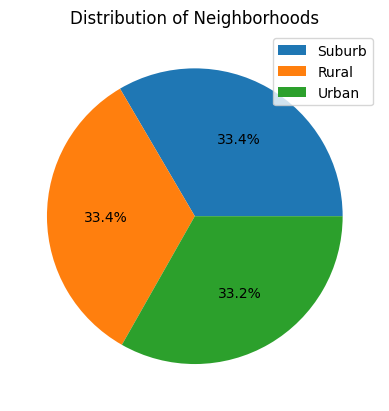

In [ ]:
df.Neighborhood.value_counts().plot.pie(autopct='%.1f%%',labels=None)
plt.ylabel('')
plt.legend(labels=df.Neighborhood.value_counts().index)
plt.title('Distribution of Neighborhoods',weight=10)

In [ ]:
numerical = df.select_dtypes(exclude='object')

Text(0.5, 1.0, 'Correlations')

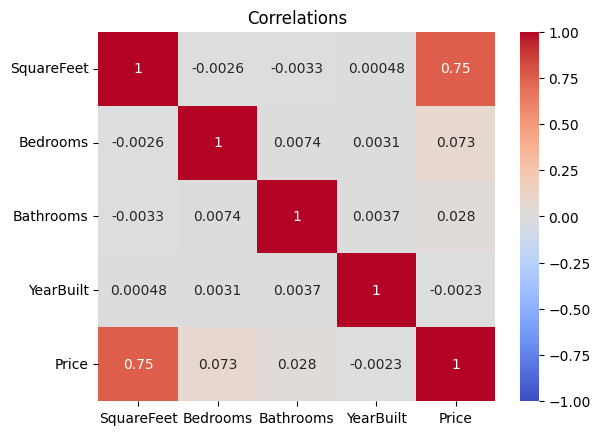

In [ ]:
sns.heatmap(numerical.corr(),cmap='coolwarm',vmin=-1,center=0,vmax=1,annot=True)
plt.title('Correlations')

There is a strong correlation between price and squarefeet; the first model will be created using squarefeet as the predictor.

In [ ]:
sample_df = df.sample(1000, random_state=43)

In [ ]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [ ]:
numerical.columns

Index(['SquareFeet', 'Bedrooms', 'Bathrooms', 'YearBuilt', 'Price'], dtype='object')

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(sample_df[numerical.columns[0]],sample_df['Price'],test_size=.25, random_state=42)
x_train_constant = sm.add_constant(x_train)
model1 = sm.OLS(y_train,x_train_constant).fit()

In [ ]:
model1.rsquared

0.563555744942049

this model can explain 56% of the variance in the prices.

In [ ]:
model1.params

const         21988.187208
SquareFeet      100.944023
dtype: float64

In [ ]:
x_test_constant = sm.add_constant(x_test)
ypred = model1.predict(x_test_constant)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(ypred,y_test) #mean-squared-error for model 1

2607177741.884214

In [ ]:
fitted = model1.predict(x_train_constant)
residuals = y_train - fitted

<Axes: ylabel='Count'>

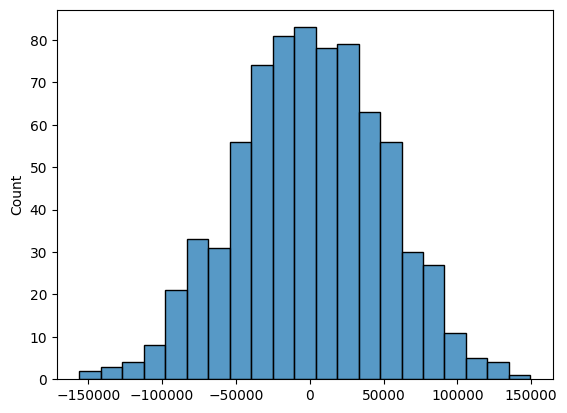

In [ ]:
sns.histplot(residuals)

Residuals(distance between points and line of best fit) are normally distributed.

<Axes: >

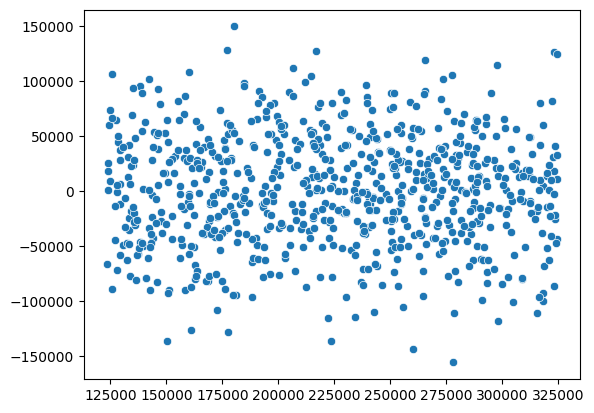

In [ ]:
sns.scatterplot(x=fitted,y=residuals)

There is no pattern in the scatter-plot.
These are rules for validating models.

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(sample_df[['SquareFeet','Bedrooms','Bathrooms']],sample_df['Price'],test_size=0.25)
x_train_constant = sm.add_constant(x_train)
model2 = sm.OLS(y_train,x_train_constant).fit()

In [ ]:
mean_squared_error(model2.predict(sm.add_constant(x_test)),y_test)

2745739371.7359376

In [ ]:
model2.rsquared

0.5612254603031761

Model 2 doesnt perform better than 1.

Checking if any of the added predictors are useful

In [ ]:
from statsmodels.stats.anova import anova_lm
model_1_2 = anova_lm(model1,model2)
model_1_2

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,748.0,1.882144e+12,0.0,NaN,NaN,NaN
1,746.0,1.856333e+12,2.0,2.581096e+10,5.186294,0.005796


the p-value of 0.005796 shows that there is atleast one predictor that contributes to housing price.
Interpretation: A small p-value (typically less than the chosen significance level(0.05) suggests that you can reject the null hypothesis. In the context of model comparison, a small p-value indicates that the additional predictors (bedrooms and bathrooms) significantly contribute to explaining the variation in house prices compared to a model with only square footage.

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(sample_df[['SquareFeet','Bedrooms']],sample_df['Price'],test_size=0.25)
x_train_constant = sm.add_constant(x_train)
model3 = sm.OLS(y_train,x_train_constant).fit()

In [ ]:
model_1_3 = anova_lm(model1,model3)
model_1_3

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,748.0,1.882144e+12,0.0,NaN,NaN,NaN
1,747.0,1.967425e+12,1.0,-8.528168e+10,-32.380094,1.0


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(sample_df[['SquareFeet','Bathrooms']],sample_df['Price'],test_size=0.25)
x_train_constant = sm.add_constant(x_train)
model4 = sm.OLS(y_train,x_train_constant).fit()

In [ ]:
model_1_4 = anova_lm(model1,model4)
model_1_4

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,748.0,1.882144e+12,0.0,NaN,NaN,NaN
1,747.0,1.936019e+12,1.0,-5.387582e+10,-20.787621,1.0


In [ ]:
model1.aic

18364.9272544318

In [ ]:
model2.aic

18358.570882808388

In [ ]:
model3.aic

18400.16304211867

In [ ]:
model4.aic

18388.094264402658

model2 seems to be the best model.

In [ ]:
model1.rsquared_adj

0.5629722633176399

In [ ]:
model2.rsquared_adj

0.5594609514304008

In [ ]:
model3.rsquared_adj

0.531855159761444

In [ ]:
model4.rsquared_adj

0.5691165375727897

In [ ]:
model1.bic

18374.16740084486

In [ ]:
model2.bic

18377.051175634508

In [ ]:
model3.bic

18414.02326173826

In [ ]:
model4.bic

18401.954484022248

In [ ]:
model2 is the best model. Despite having a slightly larger meas-squared-error compared to model1, the additional variables contribute significantly to the pricing of houses; this was proven by the low p-value.